# Handwritten Digit Recognition

<hr>

## Importing Necessary Modules

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import math
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu, sigmoid
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

import logging 
logging.getLogger("tensorflow").setLevel(logging.ERROR) 
tf.autograph.set_verbosity(0)


<hr/>

## Load the Training Data

In [2]:
train = pd.read_csv("/Users/mridulsharma/Desktop/ML_project/Handwritten-Digit-Recognition/train.csv")

In [3]:

print(f"Dataset Shape :-")
print (train.shape)

Dataset Shape :-
(42000, 785)


In [4]:
#seperate labels and dataset in order to train the model
X = train.iloc[:, 1:785]
y = train.iloc[:, 0]

In [5]:
# split the dataset into training, validation and testing dataset
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [6]:
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_validation:', X_val.shape)
print('y_validation:', y_val.shape)
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

X_train: (33600, 784)
y_train: (33600,)
X_validation: (4200, 784)
y_validation: (4200,)
X_test: (4200, 784)
y_test: (4200,)


In [7]:
# convert all the data into image shapes i.e. (28 x 28) pixels
# so that it can easily be converted to images using plt.imshow()
x_train_re = X_train.to_numpy().reshape(33600, 28, 28)
y_train_re = y_train.values
x_validation_re = X_val.to_numpy().reshape(4200, 28, 28)
y_validation_re = y_val.values
X_test_re = X_test.to_numpy().reshape(4200, 28, 28)
y_test_re = y_test.values

In [8]:
# Save image parameters to the constants that we will use later for data re-shaping and for model traning.
(_, IMAGE_WIDTH, IMAGE_HEIGHT) = x_train_re.shape
IMAGE_CHANNELS = 1

print('IMAGE_WIDTH:', IMAGE_WIDTH)
print('IMAGE_HEIGHT:', IMAGE_HEIGHT)
print('IMAGE_CHANNELS:', IMAGE_CHANNELS)

IMAGE_WIDTH: 28
IMAGE_HEIGHT: 28
IMAGE_CHANNELS: 1


<hr/>

## Explore The Data

In [9]:
pd.DataFrame(x_train_re[0])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Try visualising some of the data using pictures made using the function plt.imshow()

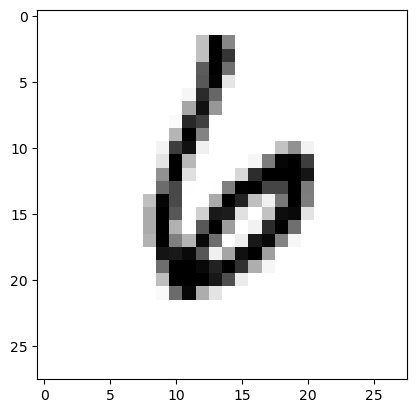

In [10]:
plt.imshow(x_train_re[0], cmap=plt.cm.binary)
plt.show()

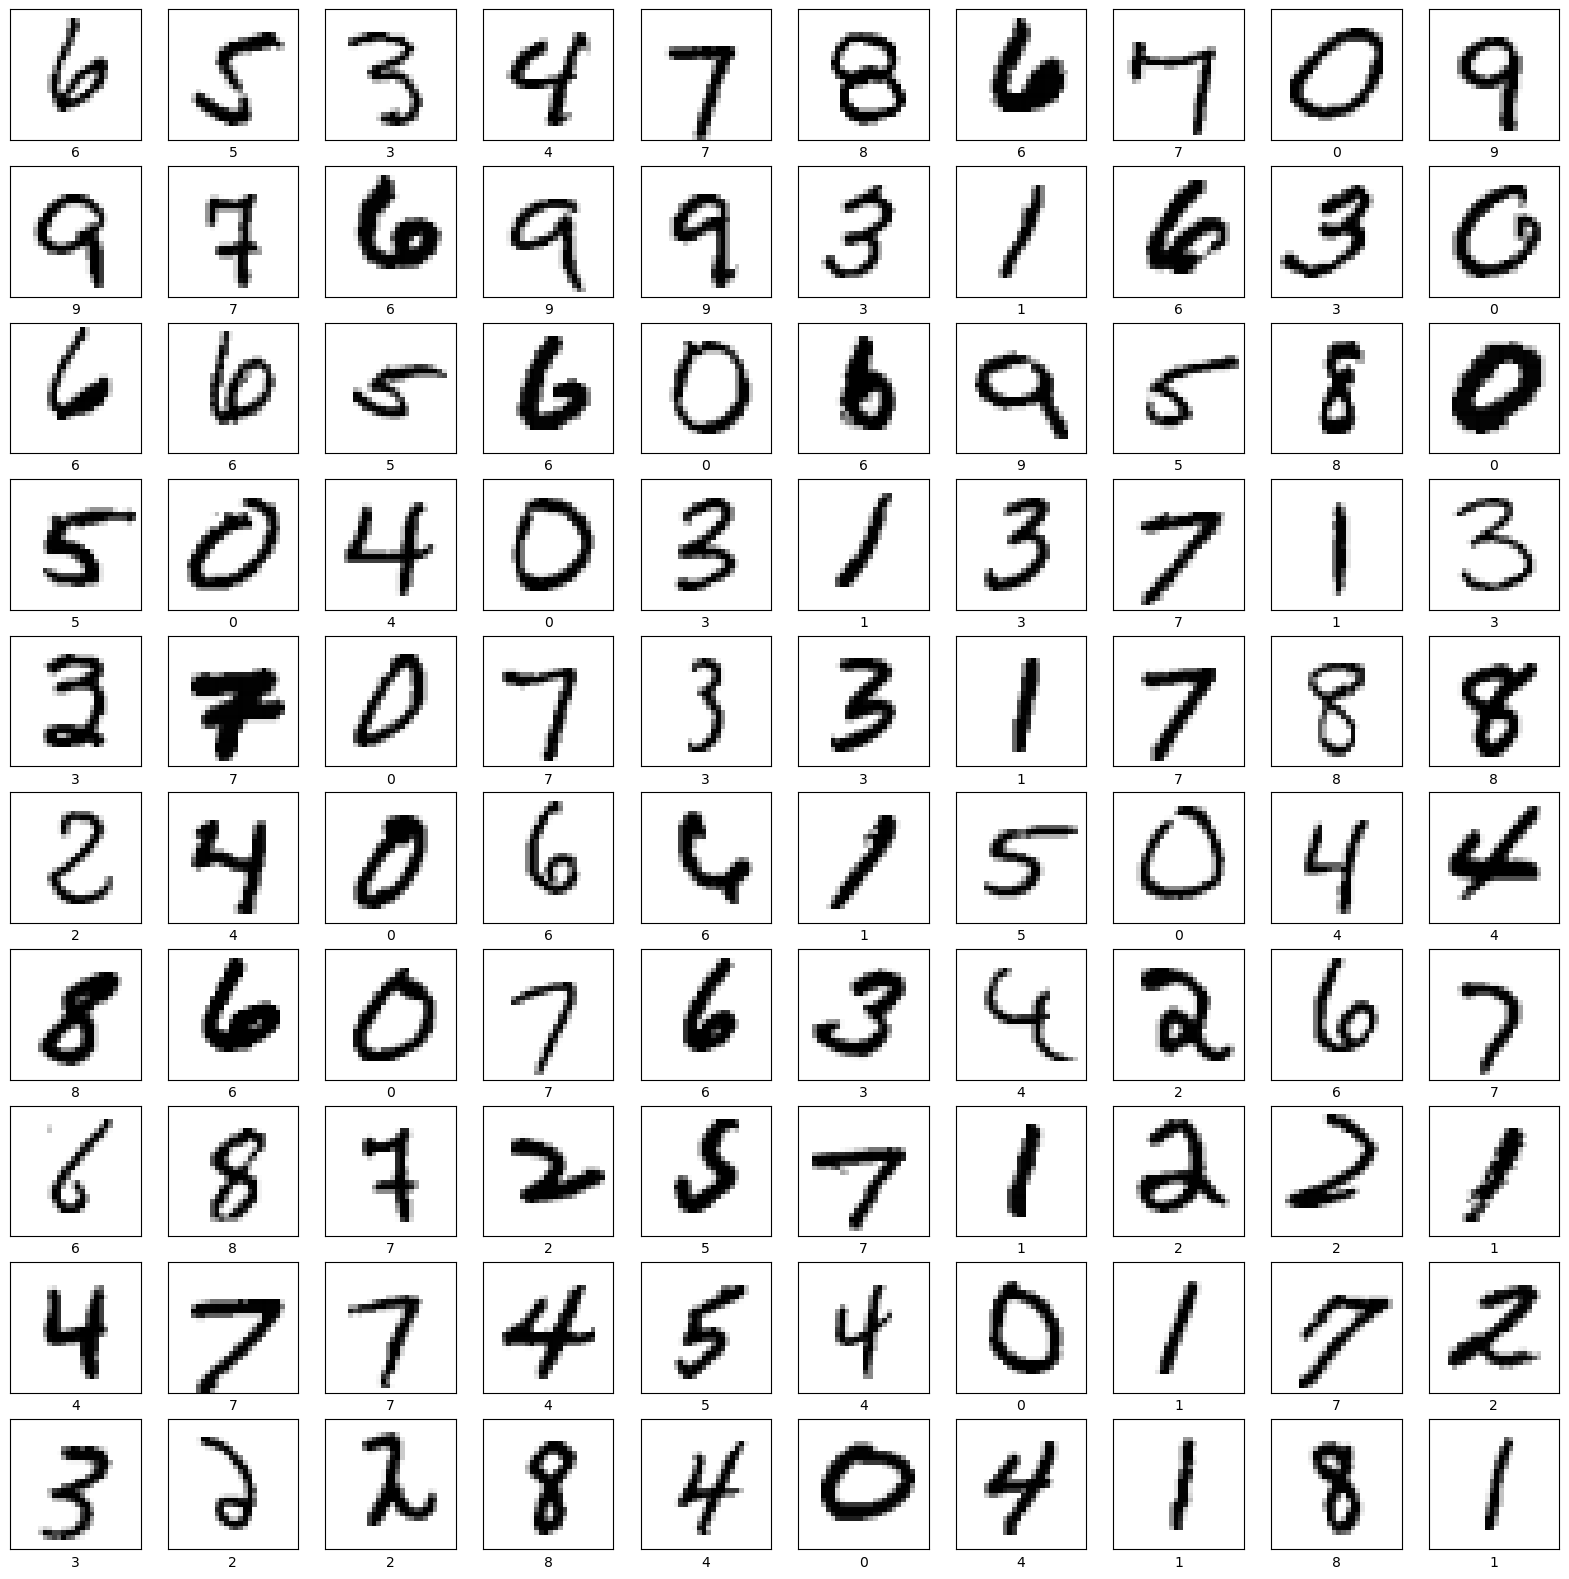

In [11]:
numbers_to_display = 100
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(20,20))
for i in range(numbers_to_display):
    plt.subplot(num_cells, num_cells, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train_re[i], cmap=plt.cm.binary)
    plt.xlabel(y_train_re[i])
plt.show()

<hr/>

## Build the Model

In [12]:
tf.random.set_seed(1234) # for consistent results 
model = Sequential(
[  
    tf.keras.Input(shape=(784,)),
    Dense(25, activation='relu', name = "L1"), 
    Dense(15, activation='relu', name = "L2"), 
    Dense(10, activation='linear', name = "L3"),
], 
name = "my_model"
)

In [13]:
model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 L1 (Dense)                  (None, 25)                19625     
                                                                 
 L2 (Dense)                  (None, 15)                390       
                                                                 
 L3 (Dense)                  (None, 10)                160       
                                                                 
Total params: 20,175
Trainable params: 20,175
Non-trainable params: 0
_________________________________________________________________


In [14]:
[layer1, layer2, layer3] = model.layers

In [15]:
#### Examine Weights shapes 
W1,b1 = layer1.get_weights() 
W2,b2 = layer2.get_weights() 
W3,b3 = layer3.get_weights()
print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}") 
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}") 
print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")

W1 shape = (784, 25), b1 shape = (25,)
W2 shape = (25, 15), b2 shape = (15,)
W3 shape = (15, 10), b3 shape = (10,)


In [16]:
model.compile( 
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy'] 
)
training_history = model.fit(
    X_train, y_train,
    epochs=40,
    validation_data=(X_val, y_val)
)


Epoch 1/40


2024-06-13 03:34:55.077667: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1050/1050 [==============================] - 1s 570us/step - loss: 2.3590 - accuracy: 0.5422 - val_loss: 0.9517 - val_accuracy: 0.6893
Epoch 2/40
1050/1050 [==============================] - 1s 485us/step - loss: 0.8104 - accuracy: 0.7523 - val_loss: 0.6351 - val_accuracy: 0.8260
Epoch 3/40
1050/1050 [==============================] - 1s 485us/step - loss: 0.5909 - accuracy: 0.8378 - val_loss: 0.5261 - val_accuracy: 0.8517
Epoch 4/40
1050/1050 [==============================] - 1s 484us/step - loss: 0.4721 - accuracy: 0.8717 - val_loss: 0.4630 - val_accuracy: 0.8750
Epoch 5/40
1050/1050 [==============================] - 1s 482us/step - loss: 0.4206 - accuracy: 0.8865 - val_loss: 0.4248 - val_accuracy: 0.8843
Epoch 6/40
1050/1050 [==============================] - 1s 516us/step - loss: 0.3878 - accuracy: 0.8958 - val_loss: 0.4007 - val_accuracy: 0.8950
Epoch 7/40
1050/1050 [==============================] - 1s 484us/step - loss: 0.3720 - accuracy: 0.8996 - val_loss: 0.3775 - val_accura

<hr/>

## Analysing Performance

#### 1. Plot Loss function w.r.t number of epochs 

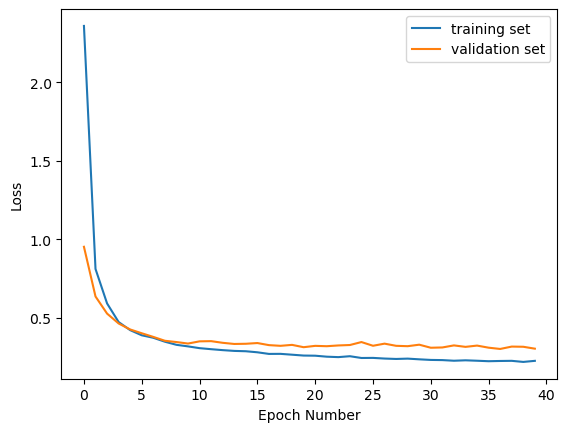

In [17]:
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.plot(training_history.history['loss'], label='training set')
plt.plot(training_history.history['val_loss'], label='validation set')
plt.legend()

#### 2. Plot accuracy w.r.t number of epochs

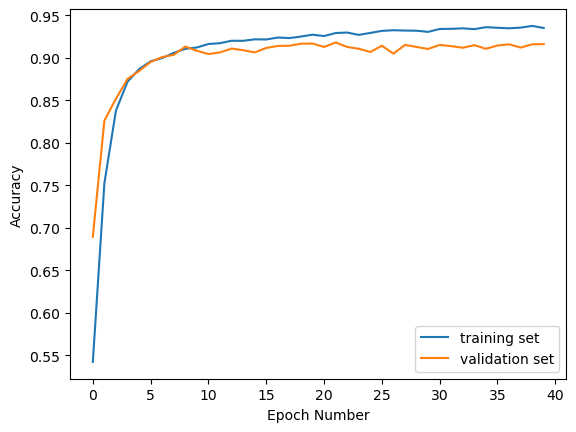

In [18]:
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.plot(training_history.history['accuracy'], label='training set')
plt.plot(training_history.history['val_accuracy'], label='validation set')
plt.legend()

<hr/>

## Testing the Trained Model 

In [19]:
predictions = model.predict([X_test])
print('predictions:', predictions.shape)

132/132 [==============================] - 0s 339us/step
predictions: (4200, 10)


In [20]:
# Predictions in form of one-hot vectors (arrays of probabilities).
# The highest probability is the predicted class.
pd.DataFrame(predictions)

,0,1,2,3,4,5,6,7,8,9
0,-0.059307,-0.128359,0.663868,0.104714,-2.414109,1.184493,-2.100404,-2.716063,5.388361,-0.356259
1,5.674420,10.296338,16.198952,15.575019,23.079638,14.064411,6.639108,17.881683,9.692022,25.153296
2,26.213758,-29.386208,15.541887,14.730158,16.380209,13.695476,15.577482,12.127200,2.531295,15.525077
3,32.725216,-34.604572,20.363014,21.154993,22.187031,20.049900,25.884226,12.308417,1.806893,20.899824
4,0.370191,2.925833,5.179207,7.176586,10.631109,7.488668,-3.335847,8.338058,4.727933,14.819428
...,...,...,...,...,...,...,...,...,...,...
4195,-0.059307,-0.128359,0.663868,0.104714,-2.414109,1.184493,-2.100404,-2.716063,5.388361,-0.356259
4196,7.938544,9.377302,10.912131,6.043306,16.169867,9.383496,5.635499,9.769498,9.559857,10.719564
4197,8.908683,4.657923,7.844144,11.039101,0.032368,15.216846,11.652621,3.692586,10.786369,10.064313
4198,-32.612610,16.077587,-0.300376,-6.827880,-0.181061,-6.103526,-12.283454,-2.232750,-1.560398,-15.525314


In [21]:
# Let's extract predictions with highest probabilites and detect what digits have been actually recognized.
predictions_ = np.argmax(predictions, axis=1)

### We have correctly identified below image as 9

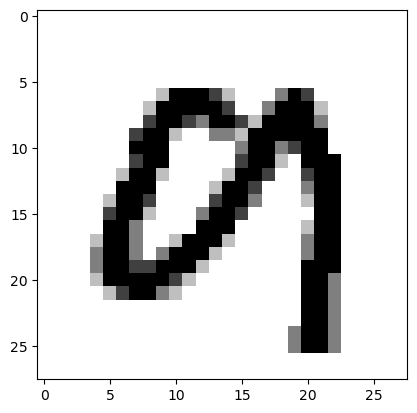

In [22]:
plt.imshow(X_test_re[0], cmap=plt.cm.binary)
plt.show()

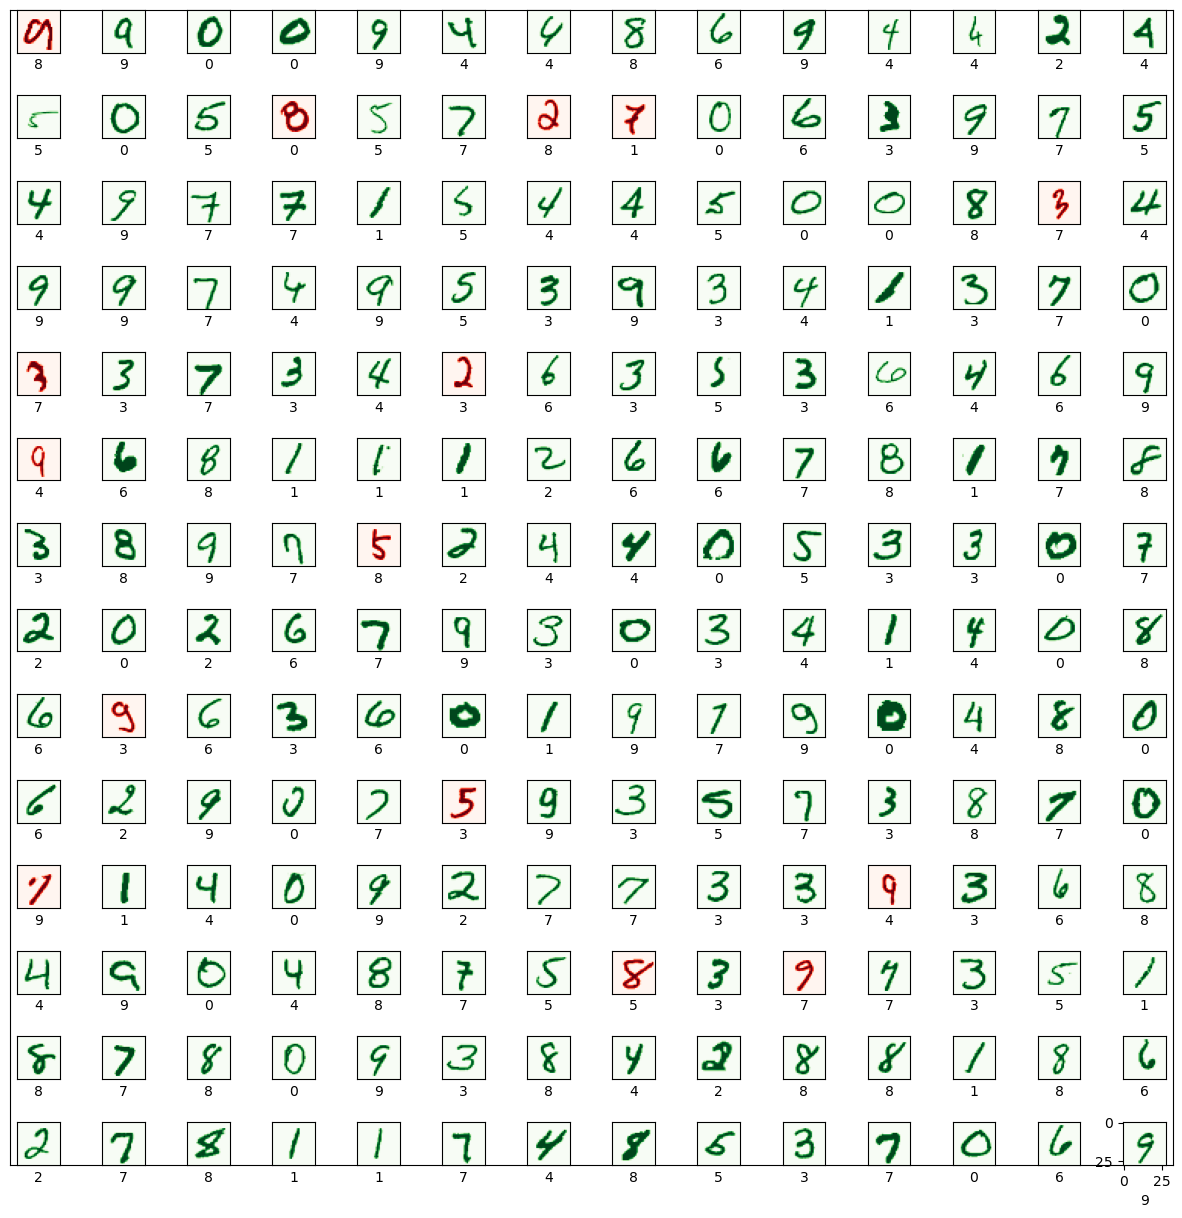

In [23]:
# green colour depicts the correct prediction and red colour depicts the wrong prediction
numbers_to_display = 196
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(15, 15))

for plot_index in range(numbers_to_display):    
    predicted_label = predictions_[plot_index]
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    color_map = 'Greens' if predicted_label == y_test_re[plot_index] else 'Reds'
    plt.subplot(num_cells, num_cells, plot_index + 1)
    plt.imshow(X_test_re[plot_index], cmap=color_map)
    plt.xlabel(predicted_label)

plt.subplots_adjust(hspace=1, wspace=0.5)
plt.show()

In [24]:
test_loss, test_accuracy = model.evaluate(X_test,y_test)


132/132 [==============================] - 0s 552us/step - loss: 0.3183 - accuracy: 0.9088


In [51]:
print(f'Validation set accuracy: {test_accuracy}')

Validation set accuracy: 0.938095211982727


<hr/>